In [1]:
import numpy as np
from scipy.signal import medfilt
import matplotlib.pyplot as plt

In [2]:
fresas = np.genfromtxt("data/GB Fresas.csv", skip_header = 2, usecols = [2, 3], delimiter = ',')
ecoli = np.genfromtxt("data/GB E.csv", skip_header = 2, usecols = [2, 3], delimiter = ',')
staphylococcus = np.genfromtxt("data/GB S.csv", skip_header = 2, usecols = [2, 3], delimiter = ',')
levadura = np.genfromtxt("data/GB Levadura.csv", skip_header = 2, usecols = [2, 3], delimiter = ',')

In [3]:
datas = [fresas, ecoli, staphylococcus, levadura]
labels = [r"F. ananassa", "E. coli", "S. aureus", "S.cerevisiae"]

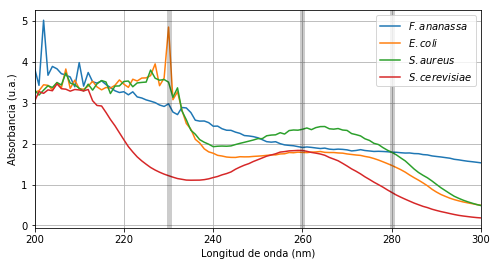

In [4]:
fig, ax = plt.subplots(figsize = (8, 4))

for i in range(len(datas)):
    x = datas[i][:, 0]
    y = datas[i][:, 1]
#     yy = medfilt(y, kernel_size = 5)
    ax.plot(x, y, label =  "$\it{%s}$" % labels[i])
    
ylims = ax.get_ylim()

ax.plot([230, 230], ylims, c = 'k', lw = 5, alpha = 0.2)
ax.plot([260, 260], ylims, c = 'k', lw = 5, alpha = 0.2)
ax.plot([280, 280], ylims, c = 'k', lw = 5, alpha = 0.2)

ax.set_ylim(ylims)
ax.set_xlim((x[-1], x[0]))
ax.set_xlabel("Longitud de onda (nm)")
ax.set_ylabel("Absorbancia (u.a.)")
ax.legend()

ax.grid()

fig.savefig("plots.png", dpi = 300)
plt.show()

In [5]:
print(r"Muestra & $A_{230}$ & $A_{260}$ & $A_{280}$ & $A_{260} / A_{280}$ \\")
for i in range(len(datas)):
    x = datas[i][:, 0]
    y = datas[i][:, 1]
    p230 = abs(x - 230).argmin()
    p260 = abs(x - 260).argmin()
    p280 = abs(x - 280).argmin()
    
    a230 = y[p230]
    a260 = y[p260]
    a280 = y[p280]
    
    label = r"\textit{%s}" % labels[i]
    
    r = a260 / a280
    values = [a230, a260, a280, r]
    values = ["%.2f" % value for value in values]
    values = [label] + values
    
    txt = " & ".join(values) + r" \\"
    print(txt)

Muestra & $A_{230}$ & $A_{260}$ & $A_{280}$ & $A_{260} / A_{280}$ \\
\textit{F. ananassa} & 2.97 & 1.91 & 1.79 & 1.06 \\
\textit{E. coli} & 4.85 & 1.79 & 1.47 & 1.22 \\
\textit{S. aureus} & 3.50 & 2.35 & 1.79 & 1.31 \\
\textit{S.cerevisiae} & 1.22 & 1.83 & 0.81 & 2.27 \\
